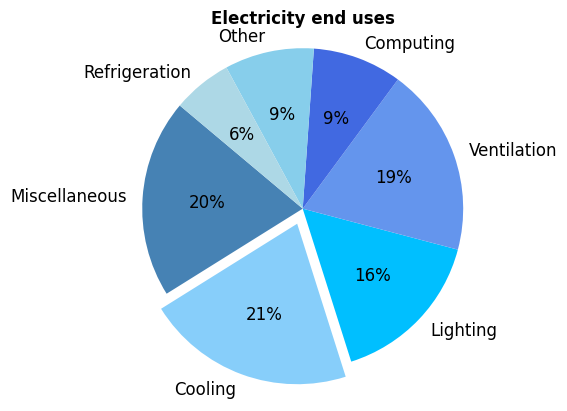

In [6]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Miscellaneous', 'Cooling', 'Lighting', 'Ventilation', 'Computing', 'Other', 'Refrigeration']
sizes = [20, 21, 16, 19, 9, 9, 6]

# Explode the largest slice (Cooling)
explode = (0, 0.1, 0, 0, 0, 0, 0)  

# Blue color palette
colors = ['steelblue', 'lightskyblue', 'deepskyblue', 'cornflowerblue', 'royalblue', 'skyblue', 'lightblue']

# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
                                  startangle=140, colors=colors)

# Add a title
plt.title(f'Electricity end uses', fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Improve text readability
for text in texts + autotexts:
    text.set_fontsize(12)

plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not '#gold'

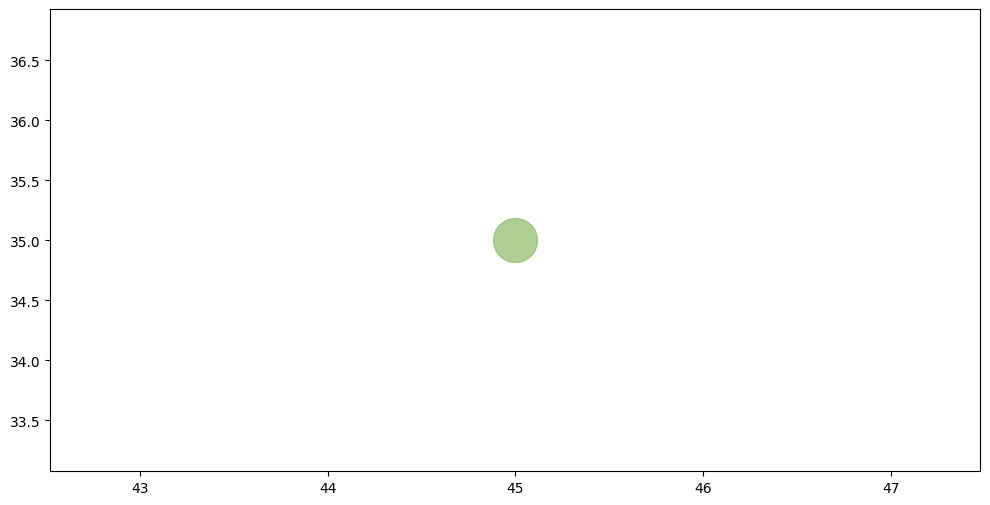

In [1]:
import matplotlib.pyplot as plt

# Data
data = {
    'Gasoline': (45, 35),
    'Diesel': (48, 33),
    'Ethanol': (35, 23),
    'LPG': (50, 20),
    'CNG': (55, 10),
    'H₂ from ammonia': (23, 20),
    'Ammonia (NH₃)': (23, 15),
    'Methanol': (15, 13),
    'Liquid H₂': (10, 10),
    'Solid state H₂': (12, 8),
    'Compressed gaseous H₂': (14, 6),
    'Batteries': (5, 2)
}

# Colors
colors = {
    'Gasoline': '#8dbb69',
    'Diesel': '#gold',
    'Ethanol': '#6495ed',
    'LPG': '#1c9099',
    'CNG': '#c7e9c0',
    'H₂ from ammonia': '#d7191c',
    'Ammonia (NH₃)': '#fdae61',
    'Methanol': '#756bb1',
    'Liquid H₂': '#41b6c4',
    'Solid state H₂': '#f03b20',
    'Compressed gaseous H₂': '#feb24c',
    'Batteries': '#762a83'
}

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

for fuel, (x, y) in data.items():
    ax.scatter(x, y, s=1000, c=colors[fuel], alpha=0.7, label=fuel)

# Add labels and title
ax.set_xlabel('Specific energy (MJ/kg)', fontsize=14)
ax.set_ylabel('Energy density (MJ/L)', fontsize=14)
# ax.set_title('Energy Density vs. Specific Energy of Various Fuels', fontsize=16)

# Add grid
ax.grid(True)

# Adjust limits
ax.set_xlim(0, 60)
ax.set_ylim(0, 45)

# Add legend
# ax.legend(loc='upper left', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

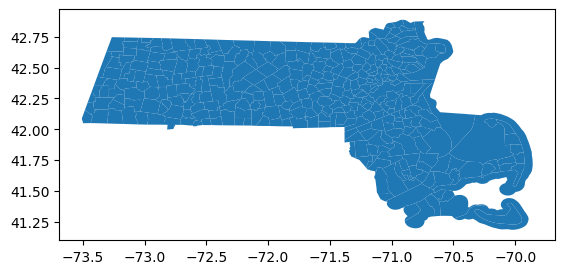

,geometry
0,"POLYGON ((-71.49701 42.2899, -71.4968 42.29031..."
1,"POLYGON ((-73.46017 42.21765, -73.45952 42.219..."
2,"POLYGON ((-73.33362 42.3689, -73.33078 42.3690..."
3,"POLYGON ((-73.27355 42.59088, -73.27344 42.591..."
4,"POLYGON ((-73.1621 42.19703, -73.16208 42.1987..."


In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile = gpd.read_file('tl_2023_25_cousub.shp') 

# Display the shapefile
shapefile.plot()
plt.show()

shapefile.head()

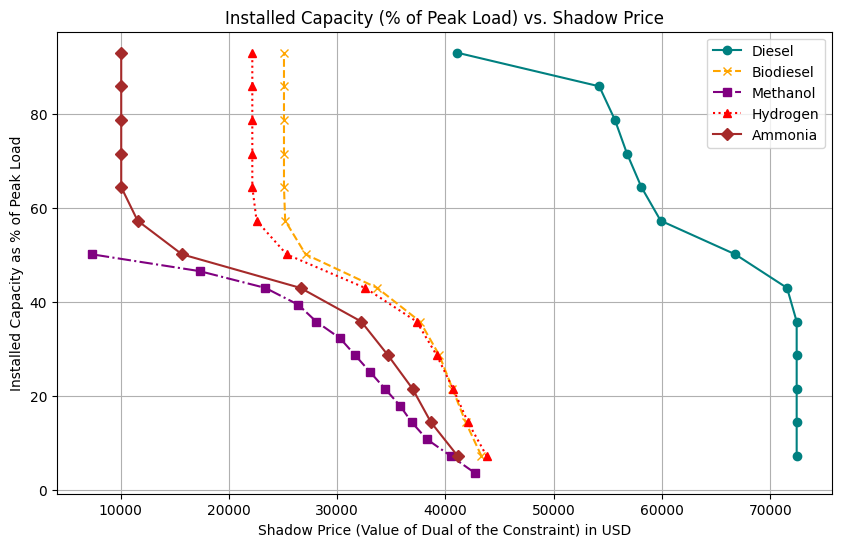

In [7]:
import matplotlib.pyplot as plt

# Data for Diesel generator
diesel_dual = [
    72432.60346, 72432.60346, 72432.60337, 72432.60328, 72432.60268,
    71543.45135, 66764.27263, 59873.36648, 58095.05242, 56761.30934,
    55649.87205, 54205.00416, 41090.96249
]
diesel_percent = [
    7.16, 14.32, 21.48, 28.64, 35.80, 42.96, 50.12, 57.29, 64.45, 71.61,
    78.77, 85.93, 93.09
]

# Data for Biodiesel generator
biodiesel_dual = [
    43320.28051, 41875.41278, 40652.8319, 39430.23241, 37651.91835,
    33706.31836, 27091.14163, 25203.82724, 25092.68172, 25092.68146,
    25092.68137, 25092.68137, 25092.68137
]
biodiesel_percent = [
    7.16, 14.32, 21.48, 28.64, 35.80, 42.96, 50.12, 57.29, 64.45, 71.61,
    78.77, 85.93, 93.09
]

# Data for Methanol fuel cell
methanol_dual = [
    42689.88021, 40482.90796, 38275.93531, 36896.5774, 35793.0914, 34413.73383,
    33034.37627, 31655.01876, 30275.66122, 28068.68926, 26413.46027, 23378.87375,
    17309.7009, 7378.327404
]
methanol_percent = [
    3.58, 7.16, 10.74, 14.32, 17.90, 21.48, 25.06, 28.64, 32.22, 35.80, 39.38,
    42.96, 46.54, 50.12
]

# Data for Hydrogen fuel cell
hydrogen_dual = [
    43803.59745, 42088.61004, 40704.93342, 39186.32356, 37339.41395, 32590.21801,
    25334.5011, 22564.10708, 22168.29228, 22168.2661, 22168.22303, 22168.22303,
    22168.22303
]
hydrogen_percent = [
    7.16, 14.32, 21.48, 28.64, 35.80, 42.96, 50.12, 57.29, 64.45, 71.61, 78.77,
    85.93, 93.09
]

# Data for Ammonia generator
ammonia_dual = [
    41128.49758, 38666.01588, 36961.21977, 34688.13089, 32225.61211, 26621.47381,
    15679.23207, 11578.65112, 10063.27384, 10063.27301, 10063.27281, 10063.27273,
    10063.27273
]
ammonia_percent = [
    7.16, 14.32, 21.48, 28.64, 35.80, 42.96, 50.12, 57.29, 64.45, 71.61, 78.77,
    85.93, 93.09
]

# Data for Primary batteries
#primary_battery_dual = [
#    24352.23341, 23148.03695, 22579.41119, 22502.07065, 19033.76676, 18931.14165,
#    15488.12106, 15488.12106, 11852.17905, 9145.734094, 7091.570833, 6445.682354,
#    6445.682354
#]
#primary_battery_percent = [
#    0.651, 1.302, 1.953, 2.604, 3.255, 3.906, 4.557, 5.208, 5.859, 6.510, 7.161,
#    7.812, 8.463
#]


# Create the plot
plt.figure(figsize=(10, 6))

# Plot Diesel data
plt.plot(diesel_dual, diesel_percent, marker='o', linestyle='-', color='teal', label='Diesel')

# Plot Biodiesel data
plt.plot(biodiesel_dual, biodiesel_percent, marker='x', linestyle='--', color='orange', label='Biodiesel')

# Plot Methanol data
plt.plot(methanol_dual, methanol_percent, marker='s', linestyle='-.', color='purple', label='Methanol')

# Plot Hydrogen data
plt.plot(hydrogen_dual, hydrogen_percent, marker='^', linestyle=':', color='red', label='Hydrogen')

# Plot Ammonia data
plt.plot(ammonia_dual, ammonia_percent, marker='D', linestyle='-', color='brown', label='Ammonia')

# Plot Primary battery data
#plt.plot(primary_battery_dual, primary_battery_percent, marker='*', linestyle='-', color='green', label='Primary Battery')


# Customize the plot
plt.title('Installed Capacity (% of Peak Load) vs. Shadow Price')
plt.xlabel('Shadow Price (Value of Dual of the Constraint) in USD')
plt.ylabel('Installed Capacity as % of Peak Load')
plt.grid(True)
plt.legend()  # Add a legend to distinguish the lines

# Show the plot
plt.show()

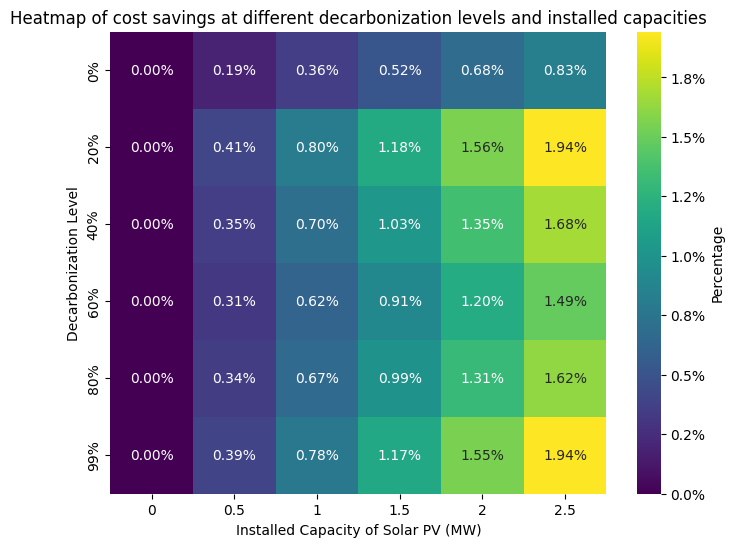

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Your data as a NumPy array
data = np.array([
    [0, 0.001875, 0.003556, 0.005175, 0.006788, 0.008311],
    [0, 0.00406, 0.008044, 0.011826, 0.015595, 0.019365],
    [0, 0.003525, 0.006984, 0.010268, 0.013541, 0.016814],
    [0, 0.003123, 0.00619, 0.009099, 0.011982, 0.014857],
    [0, 0.003418, 0.006665, 0.009892, 0.013097, 0.016208],
    [0, 0.003884, 0.007769, 0.011653, 0.015537, 0.019422]
])

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
ax = sns.heatmap(data, annot=True, fmt=".2%", cmap="viridis", cbar_kws={'label': 'Percentage'})

# Set axis labels and title
plt.xlabel("Installed Capacity of Solar PV (MW)")
plt.ylabel("Decarbonization Level")
plt.title("Heatmap of cost savings at different decarbonization levels and installed capacities")

# Define the x-axis and y-axis markers
x_markers = [0, 0.5, 1, 1.5, 2, 2.5]
y_markers = ["0%", "20%", "40%", "60%", "80%", "99%"] 

# Set x and y ticks with the defined markers
ax.set_xticks(np.arange(len(x_markers)) + 0.5, minor=False)  # Shift x ticks by 0.5
ax.set_xticklabels(x_markers)
ax.set_yticks(np.arange(len(y_markers)) + 0.5, minor=False)  # Shift y ticks by 0.5
ax.set_yticklabels(y_markers)

# Format the colorbar tick labels as percentages
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.1%}'))


# Show the plot
plt.show()

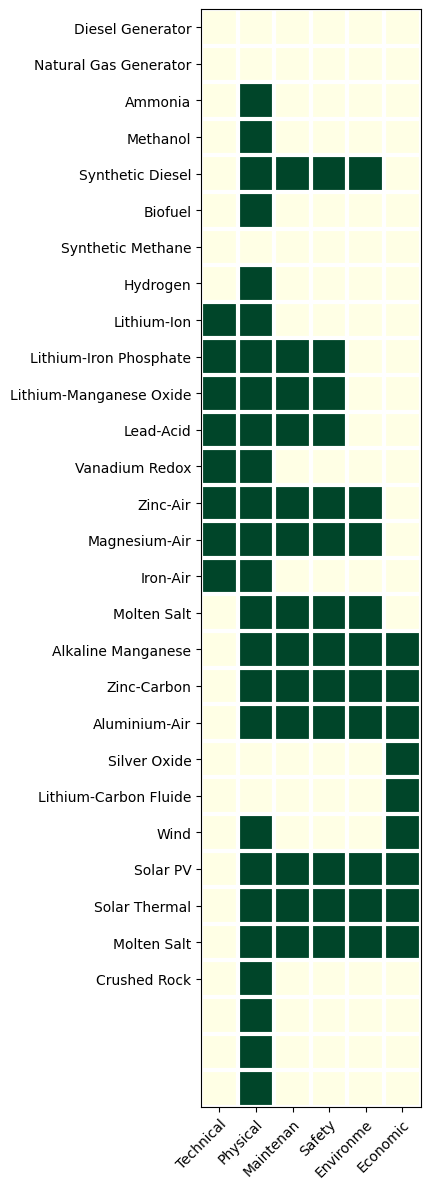

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the heatmap (replace with your actual data)
data = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 0],
    [1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
])

# Labels for the x and y axes
x_labels = ["Technical", "Physical", "Maintenan", "Safety", "Environme", "Economic"]
y_labels = [
    "Diesel Generator",
    "Natural Gas Generator",
    "Ammonia",
    "Methanol",
    "Synthetic Diesel",
    "Biofuel",
    "Synthetic Methane",
    "Hydrogen",
    "Lithium-Ion",
    "Lithium-Iron Phosphate",
    "Lithium-Manganese Oxide",
    "Lead-Acid",
    "Vanadium Redox",
    "Zinc-Air",
    "Magnesium-Air",
    "Iron-Air",
    "Molten Salt",
    "Alkaline Manganese",
    "Zinc-Carbon",
    "Aluminium-Air",
    "Silver Oxide",
    "Lithium-Carbon Fluide",
    "Wind",
    "Solar PV",
    "Solar Thermal",
    "Molten Salt",
    "Crushed Rock",
]

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 12))  # Adjust figsize as needed
im = ax.imshow(data, cmap="YlGn")

# Set axis labels
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels) 


# Rotate x-axis labels if needed
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add grid lines
ax.set_xticks(np.arange(data.shape[1] + 1) - .5, minor=True)
ax.set_yticks(np.arange(data.shape[0] + 1) - .5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)


# Show the plot
plt.tight_layout()
plt.show()

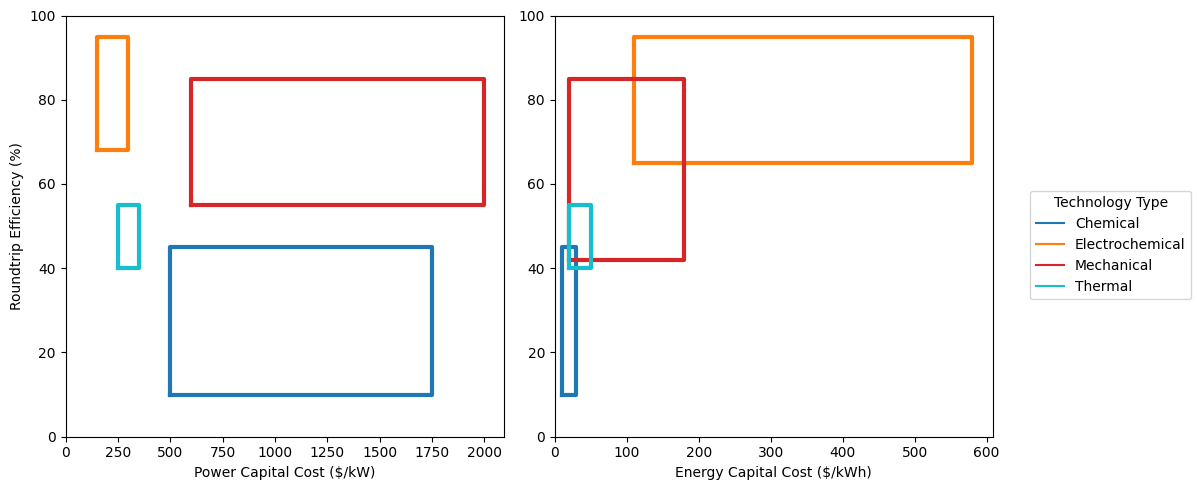

In [11]:
import matplotlib.pyplot as plt

# Data for the plot (including all 4 points for each rectangle)
# Note: The first and last points of each rectangle now have the same x-coordinate
power_cost = {
    "Chemical": [[500, 10], [1750, 10], [1750, 45], [500, 45], [500, 10]],  # Close the loop
    "Electrochemical": [[150, 68], [300, 68], [300, 95], [150, 95], [150, 68]],  # Close the loop
    "Mechanical": [[600, 55], [2000, 55], [2000, 85], [600, 85], [600, 55]],  # Close the loop
    "Thermal": [[250, 40], [350, 40], [350, 55], [250, 55], [250, 40]],  # Close the loop
}
energy_cost = {
    "Chemical": [[10, 10], [30, 10], [30, 45], [10, 45], [10, 10]],  # Close the loop
    "Electrochemical": [[110, 65], [580, 65], [580, 95], [110, 95], [110, 65]],  # Close the loop
    "Mechanical": [[20, 42], [180, 42], [180, 85], [20, 85], [20, 42]],  # Close the loop
    "Thermal": [[20, 40], [50, 40], [50, 55], [20, 55], [20, 40]],  # Close the loop
}
colors = {
    "Chemical": "tab:blue",
    "Electrochemical": "tab:orange",
    "Mechanical": "tab:red",
    "Thermal": "tab:cyan",
}

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the data
for tech_type in power_cost:
    x_coords, y_coords = zip(*power_cost[tech_type])  # Unpack coordinates
    ax1.plot(x_coords, y_coords, color=colors[tech_type], linewidth=3)

    x_coords, y_coords = zip(*energy_cost[tech_type])  # Unpack coordinates
    ax2.plot(x_coords, y_coords, color=colors[tech_type], linewidth=3)

# Set axis labels and titles
ax1.set_xlabel("Power Capital Cost ($/kW)")
ax1.set_ylabel("Roundtrip Efficiency (%)")
ax2.set_xlabel("Energy Capital Cost ($/kWh)")

# Add a legend
handles = [
    plt.Line2D([], [], color=colors[tech_type], label=tech_type)
    for tech_type in colors
]
fig.legend(handles=handles, title="Technology Type", loc="center right")

# Set axis limits to start at 0
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)
ax1.set_ylim(top=100)
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)
ax2.set_ylim(top=100)
# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()